In [1]:
!git clone https://github.com/manikanta5557/BTP-42.git

Cloning into 'BTP-42'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 34 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (34/34), 8.88 MiB | 12.70 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
%cd /content/BTP-42/

/content/BTP-42


In [3]:
!pwd

/content/BTP-42


In [4]:
!ls

 dataset.py   motion-detection.py   sam.gif		 test_normalv2.txt	     vis.py
 learner.py   put-text.py	    sample.gif		 train_anomaly.txt
 loss.py      README.md		    test_anomalyv2.txt	 train_normal.txt
 main.py      result.png	    test-file.txt	'TrainTest_Code (1).ipynb'


In [5]:
import os
parent_dir = '/content/BTP-42/'
dir1 = 'workspace'
path = os.path.join(parent_dir,dir1)
if(not os.path.exists(path)):
   os.mkdir(path)
if(not os.path.exists('/content/BTP-42/workspace/DATA')):
  os.mkdir('/content/BTP-42/workspace/DATA')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/UCF_and_Shanghai.zip -d /content/BTP-42/workspace/DATA/

In [8]:
!cp /content/BTP-42/test_anomalyv2.txt /content/BTP-42/workspace/DATA/UCF-Crime/
!cp /content/BTP-42/train_anomaly.txt /content/BTP-42/workspace/DATA/UCF-Crime/
!cp /content/BTP-42/test_normalv2.txt /content/BTP-42/workspace/DATA/UCF-Crime/
!cp /content/BTP-42/train_normal.txt /content/BTP-42/workspace/DATA/UCF-Crime/
!cp /content/BTP-42/test-file.txt /content/BTP-42/workspace/DATA/UCF-Crime/

In [9]:
!python main.py


Epoch: 0
loss = {} 0.957267681757609
auc =  0.7986444006523055

Epoch: 1
loss = {} 0.8901984713695668
auc =  0.8069906144350136

Epoch: 2
loss = {} 0.822441385851966
auc =  0.8177436552059346

Epoch: 3
loss = {} 0.7706513404846191
auc =  0.8244393439811237

Epoch: 4
loss = {} 0.7319298364497997
auc =  0.8115915362633804

Epoch: 5
loss = {} 0.6966253298300283
auc =  0.8048805170020836

Epoch: 6
loss = {} 0.6629140531575238
auc =  0.8120918079376502

Epoch: 7
loss = {} 0.6413118110762702
auc =  0.8142414520784622

Epoch: 8
loss = {} 0.6137614426789461
auc =  0.8243257675822057

Epoch: 9
loss = {} 0.5941802991761101
auc =  0.8204732731839266

Epoch: 10
loss = {} 0.5732150718017861
auc =  0.8236262072167276

Epoch: 11
loss = {} 0.553882188267178
auc =  0.8267766564074677

Epoch: 12
loss = {} 0.5461727767078964
auc =  0.818951315368131

Epoch: 13
loss = {} 0.5289049336203823
auc =  0.8318904055464397

Epoch: 14
loss = {} 0.5108956374503948
auc =  0.8173461753857162

Epoch: 15
loss = {} 0.5

In [10]:
# !cp /content/model-anomaly.pt /content/drive/MyDrive/BTP

!cp /content/drive/MyDrive/BTP/model-anomaly.pt  /content/BTP-42

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary

In [12]:
model = torch.load('/content/BTP-42/model-anomaly.pt')
# model = torch.load('/content/drive/MyDrive/BTP/model-anomaly.pt')

In [13]:
print(model.state_dict())

OrderedDict([('classifier.0.weight', tensor([[-0.0052,  0.0174,  0.0301,  ...,  0.0141,  0.0388,  0.0364],
        [ 0.0354,  0.0358, -0.0140,  ..., -0.0023, -0.0266,  0.0111],
        [ 0.0060,  0.0039, -0.0055,  ..., -0.0047, -0.0092,  0.0017],
        ...,
        [ 0.0422,  0.0231, -0.0094,  ..., -0.0213,  0.0056, -0.0043],
        [ 0.0113, -0.0027, -0.0091,  ...,  0.0163, -0.0325, -0.0008],
        [-0.0051,  0.0049, -0.0270,  ..., -0.0272,  0.0123, -0.0005]],
       device='cuda:0')), ('classifier.0.bias', tensor([ 1.5750e-03,  1.3263e-02, -5.0106e-03, -8.7301e-03, -6.9983e-03,
        -1.4401e-02,  1.0645e-02, -6.8186e-03,  1.3896e-02,  1.7087e-02,
        -6.9777e-03,  2.0498e-02,  4.3376e-03,  4.1237e-03, -5.5337e-03,
         4.0912e-03,  1.4841e-02,  5.9460e-03,  9.6040e-03,  8.5743e-03,
        -1.2358e-02,  1.6517e-02,  2.1374e-02,  2.1637e-02,  1.4930e-02,
        -7.4123e-03,  3.4827e-03,  1.7582e-02, -1.9675e-02,  1.0608e-02,
        -9.4340e-03, -4.2537e-03,  2.4587e-

In [22]:
print(model)

IsolationForest(random_state=0)


Model Trained Now checking on new data

> Indented block



In [23]:
from learner import Learner
from loss import *
from dataset import *
from sklearn import metrics
from torch.utils.data import DataLoader

In [24]:
import torch
from torch.utils.data import Dataset
import numpy as np
import os
import random

class Anomaly_Loader(Dataset):
    """
    is_train = 1 <- train, 0 <- test
    """
    def __init__(self, is_train=1, path='/content/BTP-42/workspace/DATA/UCF-Crime/'):
        super(Anomaly_Loader, self).__init__()
        self.is_train = is_train
        self.path = path
        if self.is_train == 1:
            data_list = os.path.join(path, 'train_anomaly.txt')
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()
        else:
            data_list = os.path.join(path, 'test-file.txt')
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()
                print(self.data_list)

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        if self.is_train == 1:
            rgb_npy = np.load(os.path.join(self.path+'all_rgbs', self.data_list[idx][:-1]+'.npy'))
            flow_npy = np.load(os.path.join(self.path+'all_flows', self.data_list[idx][:-1]+'.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            return concat_npy
        else:
            print(self.data_list[idx], self.data_list[idx].split("|"))
            print(self.data_list[idx].split('|')[1][1:-2])
            name, frames, gts = self.data_list[idx].split('|')[0], int(self.data_list[idx].split('|')[1]), self.data_list[idx].split('|')[2][1:-2].split(',')
            gts = [int(i) for i in gts]
            rgb_npy = np.load(os.path.join(self.path+'all_rgbs', name + '.npy'))
            flow_npy = np.load(os.path.join(self.path+'all_flows', name + '.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            return concat_npy, gts, frames


In [25]:
anomaly_test_dataset = Anomaly_Loader(is_train=0)
anomaly_test_loader = DataLoader(anomaly_test_dataset,batch_size=1)
# print(anomaly_test_dataset)

['Arrest/Arrest030_x264.mp4|8642|[5535, 7200]\n']


In [ ]:
model.eval()
auc = 0
final_score = []
with torch.no_grad():
  for i,data in enumerate(anomaly_test_loader):
    # print(data)
    inputs,gts , frames = data
    inputs = inputs.view(-1, inputs.size(-1)).to(torch.device('cuda'))
    score = model(inputs)
    score = score.cpu().detach().numpy()
    score_list = np.zeros(frames[0])
    step = np.round(np.linspace(0, frames[0]//16, 33))
    # print(score,score_list,step)
    for j in range(32):
      score_list[int(step[j])*16:(int(step[j+1]))*16] = score[j]
    final_score = score_list

In [ ]:
len(final_score)

8642

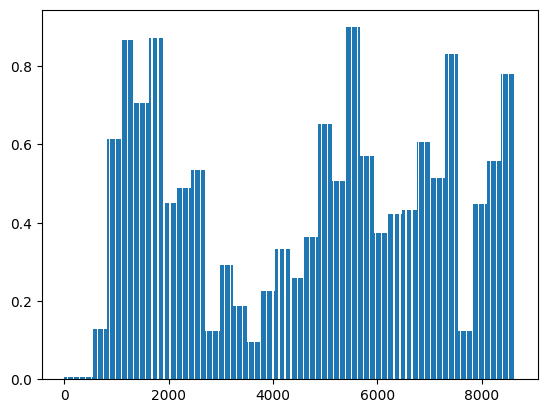

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(np.arange(0,len(final_score)),final_score)
plt.show()

In [ ]:
final_score.tofile('text.dat')

Checking data on normal video

In [ ]:
from torch.utils.data import DataLoader
from learner import Learner
from loss import *
from dataset import *
import os
from sklearn import metrics
class Normal_Loader(Dataset):
    """
    is_train = 1 <- train, 0 <- test
    """
    def __init__(self, is_train=1, path='/content/BTP-42/workspace/DATA/UCF-Crime/'):
        super(Normal_Loader, self).__init__()
        self.is_train = is_train
        self.path = path
        if self.is_train == 1:
            print("hello")
            data_list = os.path.join(path, 'train_normal.txt')
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()
        else:
            data_list = os.path.join(path, 'test_normalv2.txt')
            print(data_list)
            with open(data_list, 'r') as f:
                self.data_list = f.readlines()
                print(self.data_list)
            random.shuffle(self.data_list)
            self.data_list = self.data_list[:-10]
    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        if self.is_train == 1:
            rgb_npy = np.load(os.path.join(self.path+'all_rgbs', self.data_list[idx][:-1]+'.npy'))
            flow_npy = np.load(os.path.join(self.path+'all_flows', self.data_list[idx][:-1]+'.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            return concat_npy
        else:
            name, frames, gts = self.data_list[idx].split(' ')[0], int(self.data_list[idx].split(' ')[1]), int(self.data_list[idx].split(' ')[2][:-1])
            rgb_npy = np.load(os.path.join(self.path+'all_rgbs', name + '.npy'))
            flow_npy = np.load(os.path.join(self.path+'all_flows', name + '.npy'))
            concat_npy = np.concatenate([rgb_npy, flow_npy], axis=1)
            return concat_npy, gts, frames

In [ ]:
normal_test_dataset = Normal_Loader(is_train=0)

/content/BTP-42/workspace/DATA/UCF-Crime/test_normalv2.txt
['Normal_Videos_event/Normal_Videos_897_x264.mp4 876 -1\n', 'Normal_Videos_event/Normal_Videos_936_x264.mp4 1151 -1\n', 'Normal_Videos_event/Normal_Videos_939_x264.mp4 802 -1\n', 'Normal_Videos_event/Normal_Videos_940_x264.mp4 36018 -1\n', 'Normal_Videos_event/Normal_Videos_048_x264.mp4 1650 -1\n', 'Normal_Videos_event/Normal_Videos_034_x264.mp4 1319 -1\n', 'Normal_Videos_event/Normal_Videos_725_x264.mp4 921 -1\n', 'Normal_Videos_event/Normal_Videos_875_x264.mp4 2566 -1\n', 'Normal_Videos_event/Normal_Videos_014_x264.mp4 1500 -1\n', 'Normal_Videos_event/Normal_Videos_778_x264.mp4 1263 -1\n', 'Normal_Videos_event/Normal_Videos_352_x264.mp4 5404 -1\n', 'Normal_Videos_event/Normal_Videos_876_x264.mp4 352 -1\n', 'Normal_Videos_event/Normal_Videos_597_x264.mp4 2230 -1\n', 'Normal_Videos_event/Normal_Videos_874_x264.mp4 4227 -1\n', 'Normal_Videos_event/Normal_Videos_189_x264.mp4 738 -1\n', 'Normal_Videos_event/Normal_Videos_873_x264.

In [ ]:
normal_test_loader = DataLoader(normal_test_dataset, batch_size=1)

In [ ]:
model.eval()
auc = 0
final_score = []
with torch.no_grad():
  for i,data in enumerate(normal_test_loader):
    # print(data)
    inputs,gts , frames = data
    inputs = inputs.view(-1, inputs.size(-1)).to(torch.device('cuda'))
    score = model(inputs)
    score = score.cpu().detach().numpy()
    score_list = np.zeros(frames[0])
    step = np.round(np.linspace(0, frames[0]//16, 33))
    # print(score,score_list,step)
    for j in range(32):
      score_list[int(step[j])*16:(int(step[j+1]))*16] = score[j]
    final_score = score_list

print(final_score)

[0.01866158 0.01866158 0.01866158 ... 0.         0.         0.        ]


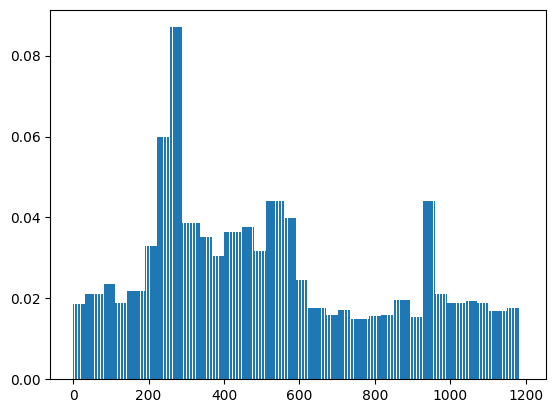

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(np.arange(0,len(final_score)),final_score)
plt.show()

In [ ]:
!pwd

/content/BTP-42


In [ ]:
!cp /anomaly-output.mp4 /content/BTP-42

cp: cannot stat '/anomaly-output.mp4': No such file or directory


In [ ]:
!pip install --upgrade opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [ ]:
image_data = np.load('/content/BTP-42/workspace/DATA/UCF-Crime/all_flows/Abuse/Abuse001_x264.mp4.npy')
print(image_data)

[[0.04106525 0.02845031 0.0249189  ... 0.01126969 0.01281324 0.        ]
 [0.04169503 0.04521982 0.02782923 ... 0.01421    0.0122077  0.00429925]
 [0.04155941 0.0289786  0.03110295 ... 0.04146164 0.00657391 0.00216482]
 ...
 [0.03876173 0.06099577 0.02692413 ... 0.00522666 0.01271371 0.        ]
 [0.04077352 0.02925941 0.02907125 ... 0.02016924 0.02530294 0.        ]
 [0.04309352 0.05569877 0.02700382 ... 0.02637631 0.00553516 0.        ]]


In [ ]:
!pwd

/content/BTP-42


In [ ]:
!python put-text.py

Traceback (most recent call last):
  File "/content/BTP-42/put-text.py", line 4, in <module>
    final_output = np.fromfile('text -1.dat',dtype = float)
FileNotFoundError: [Errno 2] No such file or directory: 'text -1.dat'


In [14]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.8 MB/s eta 0:00:00


In [15]:
import shap
shap.initjs()

PermutationExplainer explainer: 33it [1:04:56, 121.77s/it]


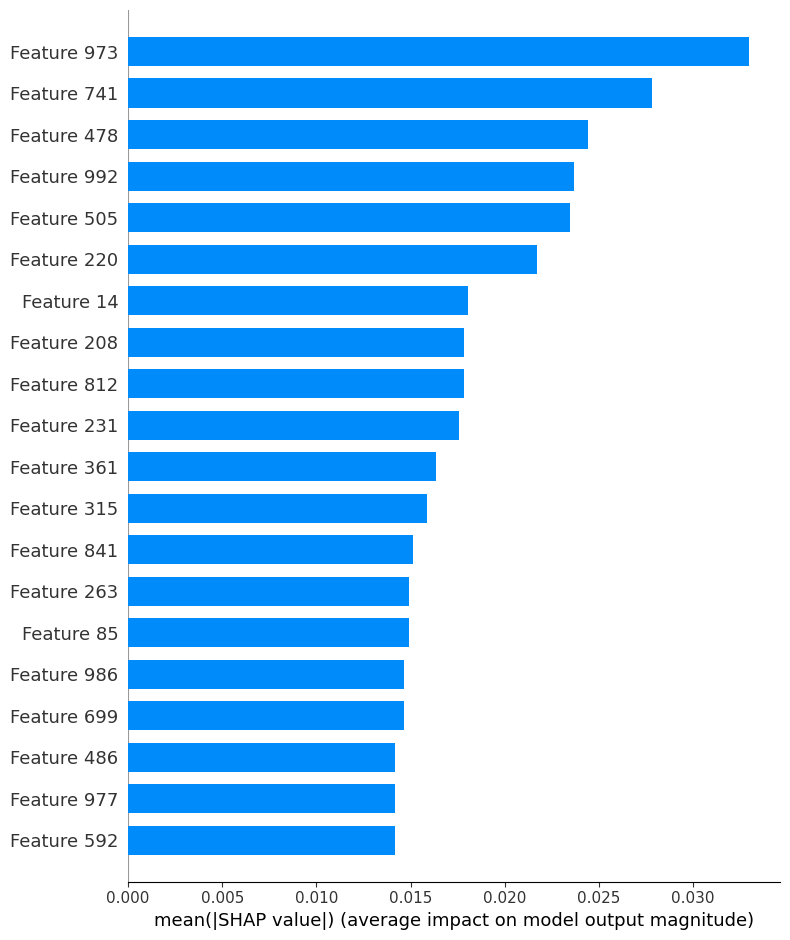

In [16]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest  # Example anomaly detection model

# Load the input data from the .npy file
input_data = np.load('/content/BTP-42/workspace/DATA/UCF-Crime/all_flows/Abuse/Abuse001_x264.mp4.npy')  # Replace with your .npy file path

# Create and fit the anomaly detection model (Isolation Forest)
model = IsolationForest(random_state=0)
model.fit(input_data)  # Fit the model with the input data

# Initialize a SHAP explainer with the model's predict function
explainer = shap.Explainer(model.predict, input_data)

# Compute SHAP values for the input data
shap_values = explainer.shap_values(input_data)

# Visualize the SHAP values (force plot)
shap.summary_plot(shap_values, input_data, plot_type='bar')
plt.show()


In [17]:
print(shap_values)

[[-0.0078125  0.         0.        ...  0.        -0.0078125  0.       ]
 [ 0.         0.        -0.0078125 ... -0.0078125  0.         0.       ]
 [ 0.015625   0.         0.        ...  0.        -0.015625   0.       ]
 ...
 [ 0.        -0.046875   0.        ...  0.         0.         0.       ]
 [ 0.         0.0078125  0.        ...  0.         0.         0.       ]
 [ 0.        -0.0625     0.0078125 ...  0.         0.         0.       ]]


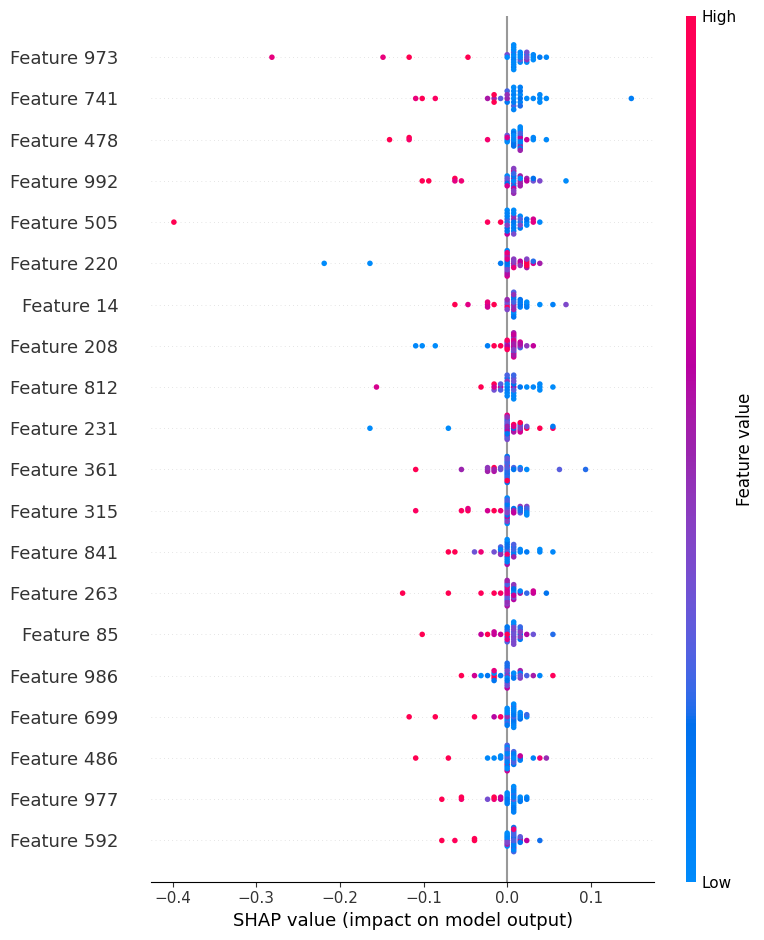

In [18]:
shap.summary_plot(shap_values, input_data, plot_type='dot')
plt.show()

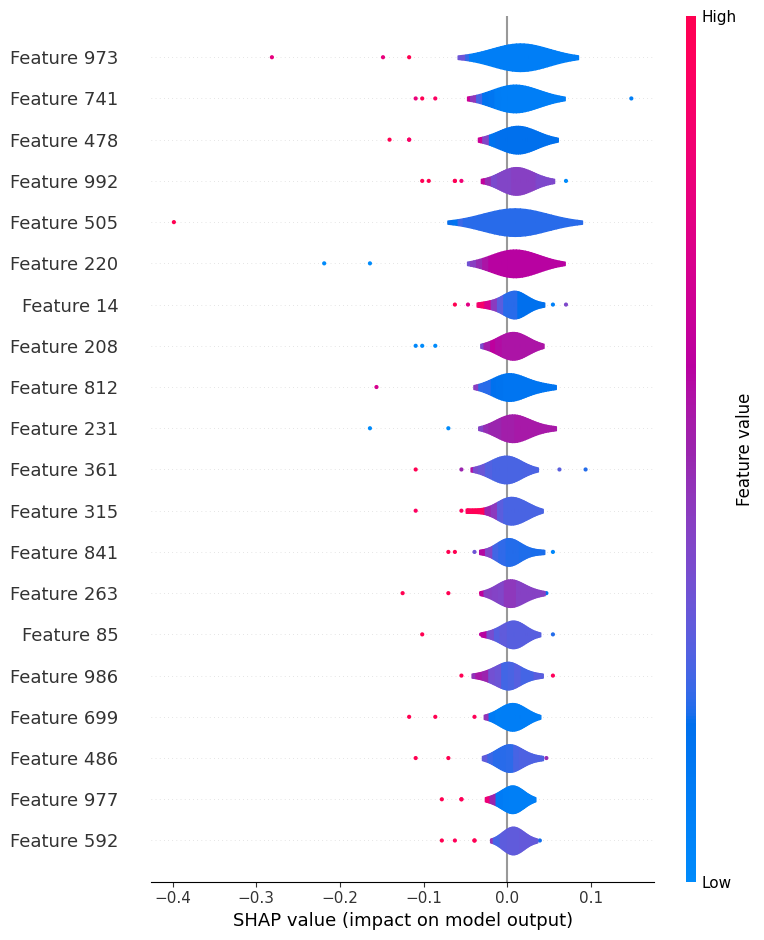

In [19]:
shap.summary_plot(shap_values, input_data, plot_type='violin')
plt.show()

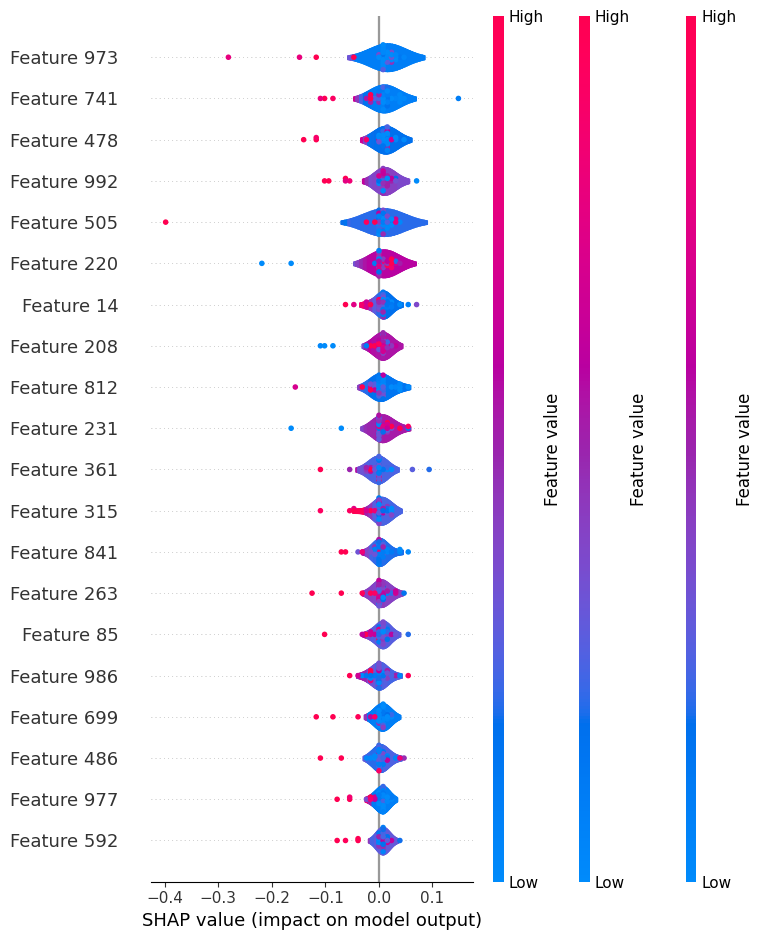

In [20]:
shap.summary_plot(shap_values, input_data, plot_type='violin', show=False)  # Violin plot
shap.summary_plot(shap_values, input_data, plot_type='dot', show=False)  # Dot plot
shap.summary_plot(shap_values, input_data, plot_type='violin', show=False)  # Violin plot
plt.show()  # Show the combined plot


In [21]:
shap.waterfall_plot(expected_value, shap_values[index], features[index], show=True)
plt.show()

NameError: name 'expected_value' is not defined

In [ ]:
# Assuming you have your background data (X_bg)
explainer = shap.KernelExplainer(model_wrapper, anomaly_test_dataset)


TypeError: Unknown type passed as data object: <class '__main__.Anomaly_Loader'>